In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.shape

(48842, 15)

In [5]:
data.replace("?", pd.NA, inplace=True)

In [6]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


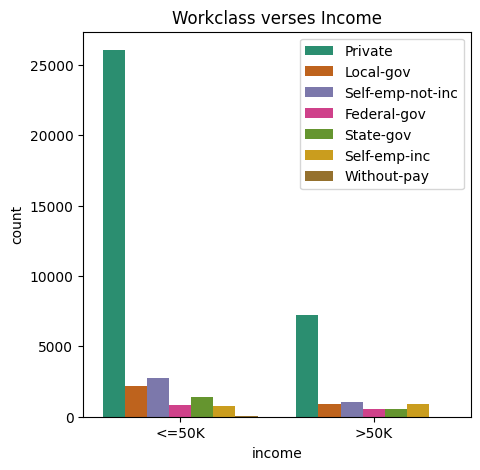

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(x='income',hue='workclass',data=data,palette='Dark2')
plt.legend(loc='best')
plt.title("Workclass verses Income")
plt.show()

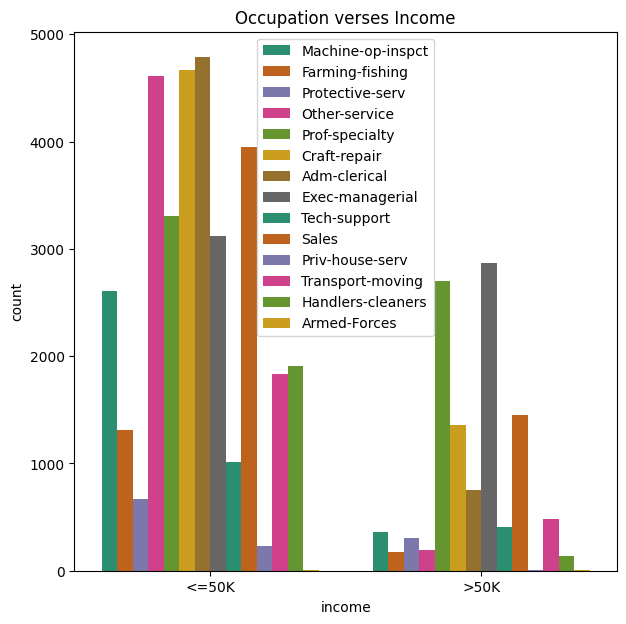

In [12]:
plt.figure(figsize=(7,7))
sns.countplot(x='income',hue='occupation',data=data,palette='Dark2')
plt.legend(loc='best')
plt.title("Occupation verses Income")
plt.show()

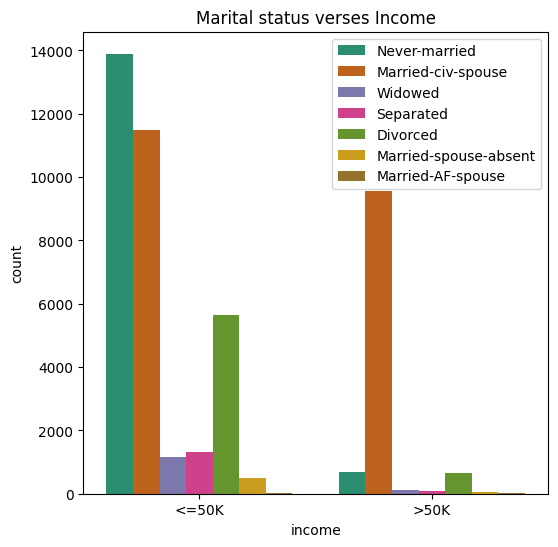

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='income',hue='marital-status',data=data,palette='Dark2')
plt.legend(loc='best')
plt.title("Marital status verses Income")
plt.show()

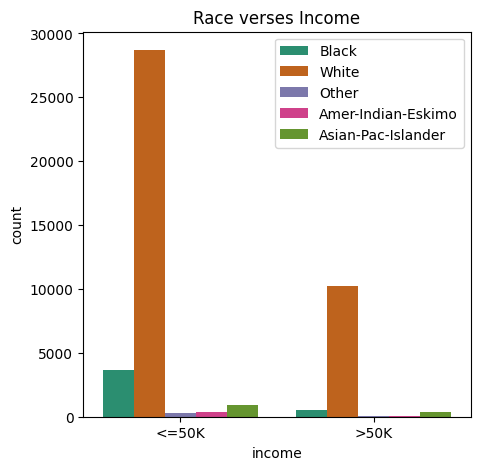

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(x='income',hue='race',data=data,palette='Dark2')
plt.legend(loc='best')
plt.title("Race verses Income")
plt.show()


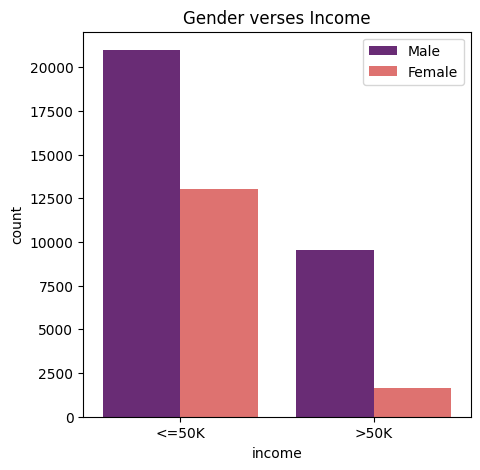

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(x='income',hue='gender',data=data,palette='magma')
plt.legend(loc='best')
plt.title("Gender verses Income")
plt.show()

C:\Users\sunit\AppData\Local\Temp\ipykernel_1772\798292678.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


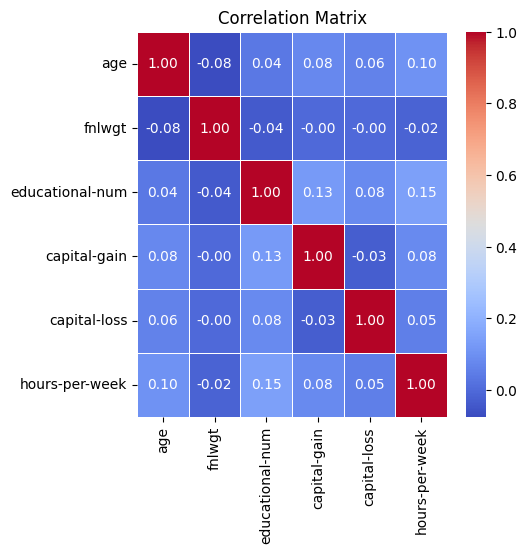

In [19]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [17]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)
# Mapping ">50K" to 1 and "<=50K" to 0
data_encoded["income"] = data_encoded["income"].map({">50K": 1, "<=50K": 0})
data_encoded.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [20]:
X = data_encoded.drop('income', axis=1)
y = data_encoded['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.7899391929242675
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      6842
           1       0.65      0.30      0.41      2203

    accuracy                           0.79      9045
   macro avg       0.73      0.62      0.64      9045
weighted avg       0.77      0.79      0.76      9045



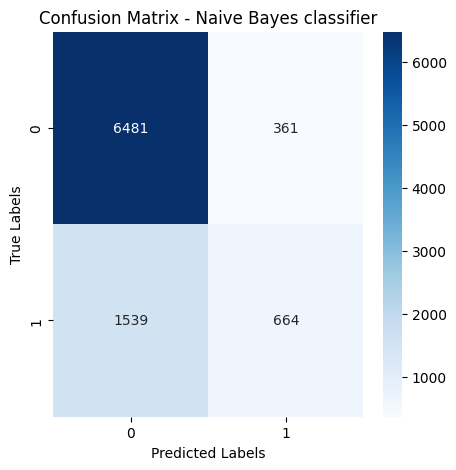

In [21]:
# Create a Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the Naive Bayes model on the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data using Naive Bayes
y_pred_nb = naive_bayes.predict(X_test)

# Evaluate the accuracy of the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)

nb_report = classification_report(y_test, y_pred_nb)
print("Naive Bayes Classification Report:")
print(nb_report)

# Compute confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Naive Bayes classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy: 0.7948037589828635
Support vector machine Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      6842
           1       0.97      0.16      0.28      2203

    accuracy                           0.79      9045
   macro avg       0.88      0.58      0.58      9045
weighted avg       0.83      0.79      0.73      9045



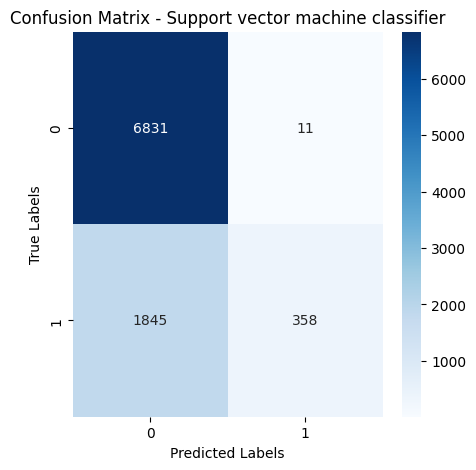

In [25]:
svm = SVC()

# Train the SVM model on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data using SVM
y_pred_svm = svm.predict(X_test)

# Evaluate the accuracy of the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

svm_report = classification_report(y_test, y_pred_svm)
print("Support vector machine Classification Report:")
print(svm_report)

# Compute confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Support vector machine classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy: 0.8737423991155334
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6842
           1       0.78      0.66      0.72      2203

    accuracy                           0.87      9045
   macro avg       0.84      0.80      0.82      9045
weighted avg       0.87      0.87      0.87      9045



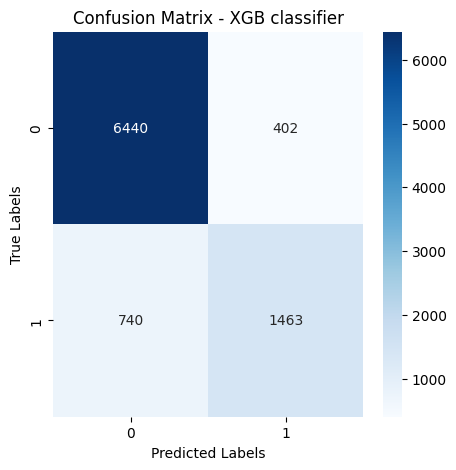

In [26]:

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data using XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)

xgb_report = classification_report(y_test, y_pred_xgb)
print("XGBoost Classification Report:")
print(xgb_report)

# Compute confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_xgb, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - XGB classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()